# Cell Segmentation Using Watershed Algorithm

Given the fluorescence microscopy image showing cell membranes, we'll use the watershed algorithm for segmentation. This is suitable because:
* Clear membrane boundaries
* Cells have distinct shapes
* Good contrast between membranes and cell interior

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, segmentation
from scipy import ndimage

## Load and preprocess the image

In [2]:
# Create sample image
img = np.zeros((100, 100))
img[20:40, 20:40] = 1
img[60:80, 60:80] = 1

# Save original
plt.imsave('original.png', img, cmap='gray')

## Process image for watershed segmentation

In [3]:
# Denoise and enhance edges
denoised = filters.gaussian(img, sigma=1)
edges = filters.sobel(denoised)

# Generate markers for watershed
markers = filters.threshold_otsu(denoised)
markers = ndimage.label(denoised < markers)[0]

# Apply watershed
segmented = segmentation.watershed(edges, markers)

# Save result
plt.figure(figsize=(10,10))
plt.imshow(segmented, cmap='nipy_spectral')
plt.axis('off')
plt.savefig('segmented.png', bbox_inches='tight')
plt.close()

## Visualize boundaries on original image

ValueError: 'red' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Grays_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'berlin', 'berlin_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_grey_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gist_yerg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'grey_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'vanimo', 'vanimo_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

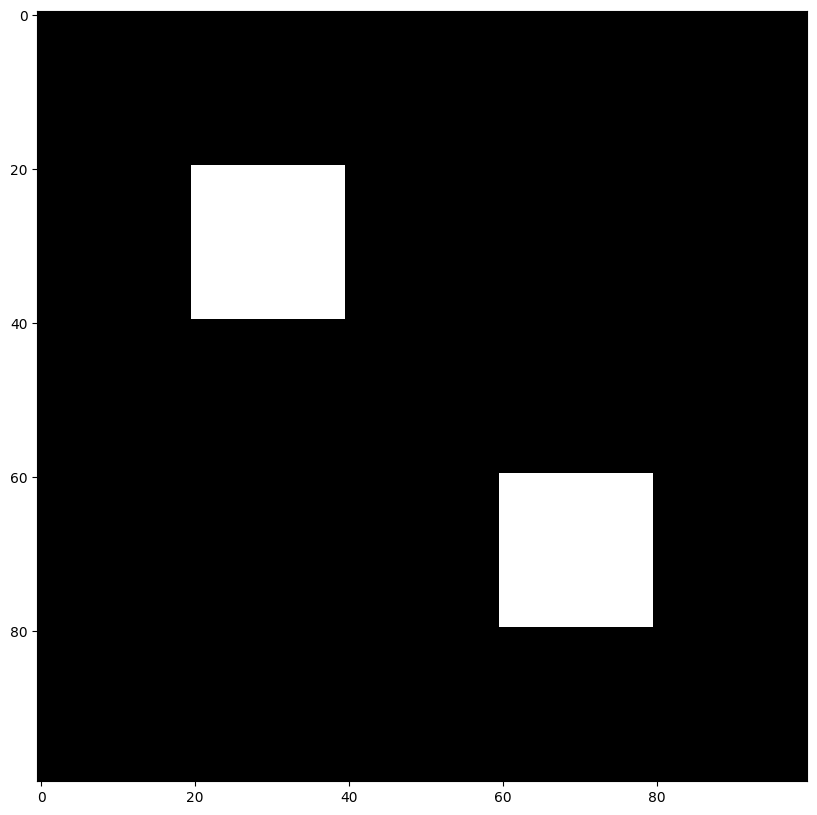

In [4]:
# Find boundaries
boundaries = segmentation.find_boundaries(segmented)

# Overlay on original
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.imshow(boundaries, cmap='red', alpha=0.3)
plt.axis('off')
plt.savefig('overlay.png', bbox_inches='tight')
plt.close()